### 1. 차원 축소 개요

- 대표적인 차원 축소 알고리즘 : PCA, LDA, SVD, NMF


**차원축소(Demension Reduction)**
    - 매우 많은 피처로 구성된 다차원 데이터 세트의 차원 축소해 새로운 차원의 데이터 세트 생성하는 것
    - 차원이 증가할수록 데이터 포인트 간 거리가 기하급수적으로 멀어지고, 희소(sparse)한 구조 가지게 됨
- 피처가 많을 경우
    - 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도 떨어짐
    - 개별 피처간 상관관계 높을 가능성 큼
    - 선형 모델에서는 입력 변수간 상관관계가 높을 경우 다중 공선성 문제로 인해 모델 예측 성능 저하됨


**차원 축소를 통해 피처 수를 줄이면**   
    - 직관적으로 데이터 해석할 수 있음   
    - 학습 데이터 크기가 줄어들어 학습에 필요한 처리 능력도 줄일 수 있음


**- 차원 축소 종류**

    1. 피처 선택(feature selection)
        - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
    2. 피처 추출(feature extraction)
        - 기존 피처를 저차원의 중요 피처로 압축해 추출하는 것
        - 추출된 특성은 기존 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
        - 기존 피처를 단순 압축이 아니라 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출함
        - 기존 피처가 인지하기 어려웠던 잠재적 요소(Latent Factor)를 추출하는 것을 의미함


- 차원 축소는 단순히 데이터를 압축을 의미하는 것이 아니라 차원 축소를 통해 더 데이터를 잘 설명할 수 있는 잠재적 요소를 추출하는 것이 더 중요한 의미임.

- PCA,SVD,NMF는 이처럼 잠재적 요소를 찾는 대표적 차원 축소 알고리즘   
    ex) 이미지, 텍스트에서 차원축소를 통해 잠재적 의미 찾아주는 데 활용
    
    
**이미지 데이터**
- 매우 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행 → 원본 이미지보다 훨씬 작은 차원이기 때문에 분류 수행 시 과적합 영향력이 작아져 원본 이미지보다 성능을 끌어올릴 수 있음


**텍스트 데이터**
- 문서는 많은 단어로 구성되어있어 차원 축소를 통해 문서 내 단어들의 구성에서 숨겨져있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있음
    - SVD, NMF → 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용   
    
    * Semantic : 의미의 , 의미론적인
    * Topic : 주제

### 2. PCA(Principal Component Analysis)

#### PCA 개요

- 가장 대표적인 차원 축소 기법
- 여러 변수 간 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component) 추출해 차원 축소하는 기법
- 기존 데이터의 정보 유실이 최소화 됨
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원 축소 → 이 축이 PCA의 주성분이 됨
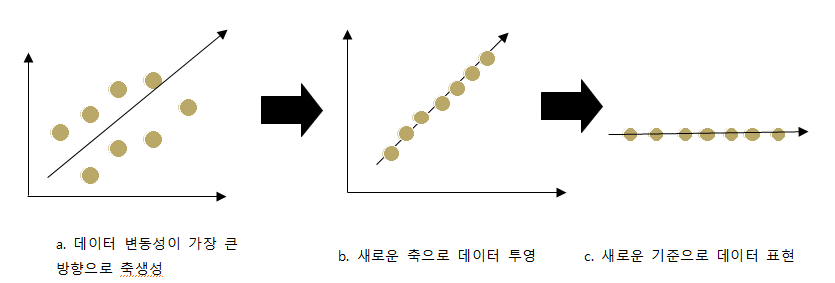
- 데이터 변동성이 가장 큰 방향으로 축 생성하고, 새롭게 생성된 축으로 데이터 투영
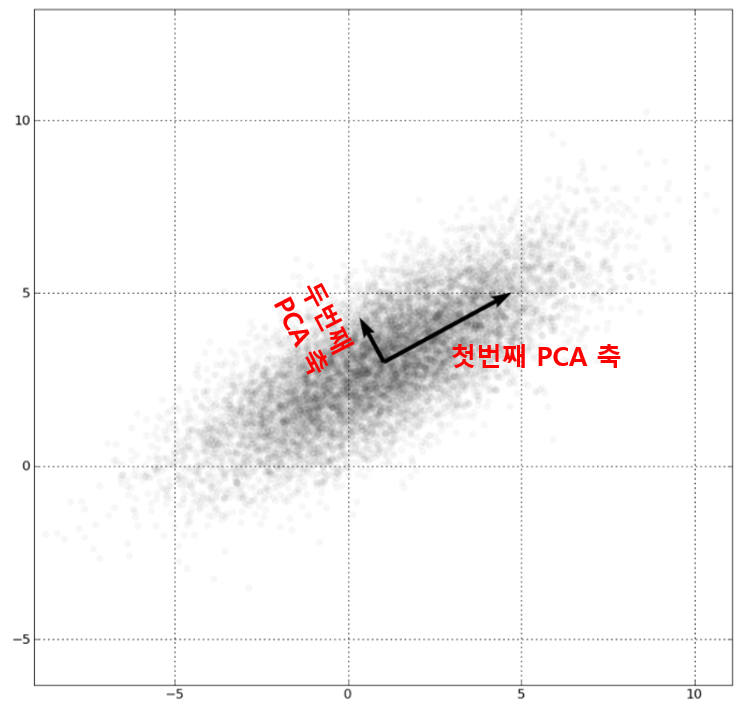
- 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축 생성하고, 두 번째 축은 이 벡터 축에 직가깅 되는 벡터를 축으로 함.
- 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 형식으로 생성
- 벡터 축의 개수만큼의 차원으로 원본 데이터 차원 축소됨

- 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성 대부분 설명할 수 있는 분석법
- 선형 대수 관점에서 해석
    - 입력 데이터의 공분산 행렬을 고유값 분해하고, 구한 고유벡터에 입력 데이터를 선형 변환
    - 고유 벡터가 PCA의 주성분 벡터가 되고 고유값은 고유벡터의 크기 & 입력 데이터의 분산 나타냄
    - 선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것 ( 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념) , 행렬을 공간으로 가정함
    - 공분산 행렬 : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
    - 고유 벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
    - 정방 행렬은 최대 그 차원의 수만큼 고유벡터를 가질 수 있음
    - 고유벡터는 행렬이 작용하는 힘의 방향과 관계 있어 행렬 분해하는데 사용
    - 공분산 행렬은 정방행렬(Diagonal Matrix)&대칭행렬(Symmetric)
    - 대칭 행렬은 항상 고유벡터를 직교행렬(orthogonal) , 고유값을 정방 행렬로 대각화 할 수 있음
    
 **입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA임**
 1. 입력 데이터 세트의 공분산 행렬 생성
 2. 공분산 행렬의 고유벡터와 고유값 계산
 3. 고유값이 큰 순으로 K개(PCA 변환 차원 수 만큼) 고유벡터 추출
 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [2]:
# 붓꽃 데이터로 실습
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


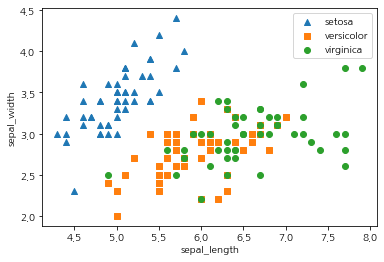

In [4]:
# 2차원 시각화
markers = ['^','s','o'] # setosa, versicolor, virginica

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()
# setosa의 경우 sepal width가 3.0보다 크고 sepal length가 6.0 이하인 곳에 일정하게 분포
# versicolor와 virginica는 sepal width와 sepal length 만으로는 분류가 어려움

In [5]:
# PCA로 4개의 속성을 2개로 압축 후 시각화
# PCA 적용 전 개별 속성을 함께 스케일링 해야함 ! 
# 여러 속성값을 연산해야 하므로 속성의 스케일에 영향받음
from sklearn.preprocessing import StandardScaler
# target 데이터 제외 모든 값 표준 정규 분포로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [9]:
# iris_pca는 150*2 넘파이 행렬
# 데이터 프레임으로 변환 후 값 확인
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


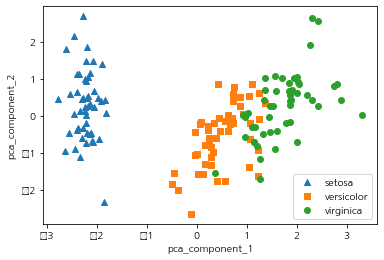

In [10]:
markers = ['^','s','o'] # setosa, versicolor, virginica

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')

plt.show()

# pca_component_1 축을 기준으로 Setosa는 명확하게 구분 가능
# Versicolor와 Virginica는 pca_component_1 축을 기준으로 겹치는 부분이 있긴 하지만 비교적 잘 구분됨

In [11]:
# 컴포넌트 별 변동성 비율 확인
print(pca.explained_variance_ratio_)
# 두 개의 요소만으로 원본 데이터 변동성의 95% 설명 가능

[0.72962445 0.22850762]


In [13]:
# 원본 데이터에 분류 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('교차 검증 개별 정확도:',scores)
print('평균 정확도:',np.mean(scores))

교차 검증 개별 정확도: [0.98 0.94 0.96]
평균 정확도: 0.96


In [15]:
# PCA 변환 데이터에 분류 적용
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('교차 검증 개별 정확도:',scores_pca)
print('평균 정확도:',np.mean(scores_pca))
# 원본 데이터 대비 8% 하락
# 속성 개수가 50% 감소한 것을 고려하면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음

교차 검증 개별 정확도: [0.88 0.88 0.88]
평균 정확도: 0.88


#### 신용카드 고객 데이터 세트 

In [17]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
df = pd.read_excel('./data/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)
# default payment next month : 타겟값, 다음달 연체 여부 (1:연체, 0:정상납부)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [19]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

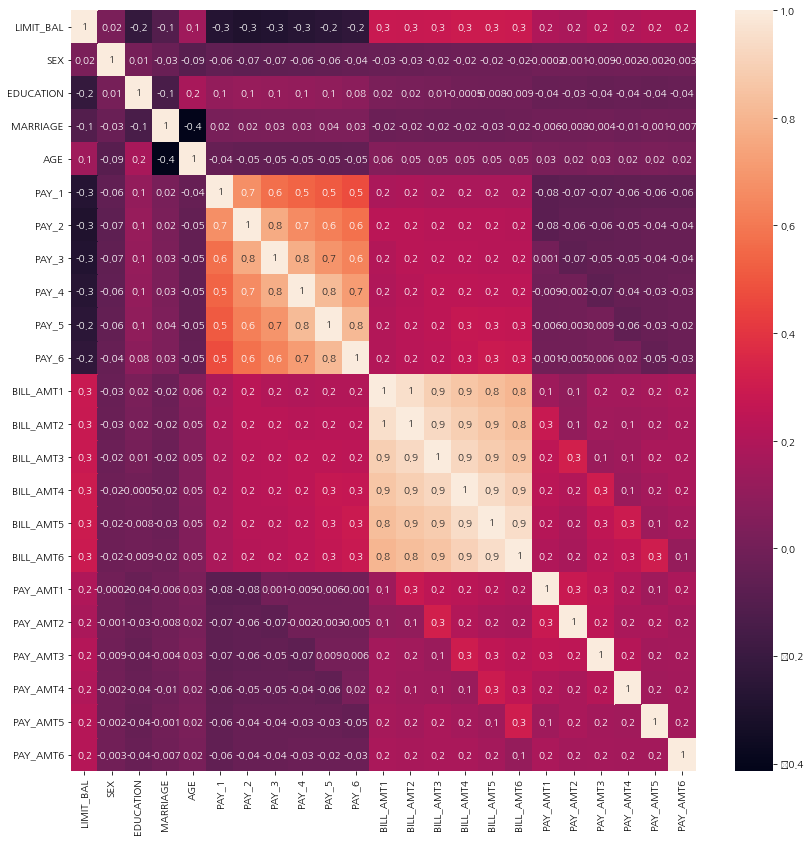

In [21]:
# heatmap 시각화
import seaborn as sns
corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- PAY_1 ~ PAY_6 속성 역시 상관도 높음
- 높은 상관도 가진 속성들은 소수의 PCA로 자연스럽게 이 속성들의 변동성 수용 가능

In [24]:
# BILL_AMT1 ~ BILL_AMT6 -> 2개의 컴포넌트로 PCA 변환
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print(pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
[0.90555253 0.0509867 ]


In [25]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('교차 검증 개별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

교차 검증 개별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('교차 검증 개별 정확도:',scores_pca)
print('평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

교차 검증 개별 정확도: [0.792  0.7966 0.8023]
평균 정확도:0.7970


- 23개의 속성을 1/4 수준인 6개의 컴포넌트로 분류 예측했을 때 원본 대비 1-2%정도의 성능 저하만 발생함
- PCA의 뛰어난 압축 능력을 잘 보여줌
- PCA는 컴퓨터 비전/ 얼굴 인식 EIgen-face 변환으로 주로 사용

### 3. LDA(Linear Discriminant Analysis)

#### LDA 개요
- 선형 판별 분석법 / PCA와 매우 유사
- 입력 데이터 세트를 저차원 공간에 투영해 차원 축소하는 기법
- 지도 학습의 분류에서 사용하기 쉽도록 개별 클래스 분별할 수 있는 기준을 최대한 유지하면서 차원 축소
- PCA와 다르게 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축 찾음
- 특정 공간 상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소
    - 즉, 클래스 간 분산은 최대한 크게, 클래스 내부 분산은 최대한 작게 가져가는 방식
    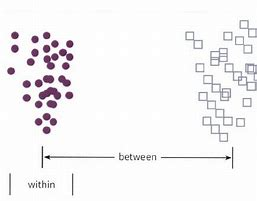


- PCA와 가장 큰 차이점은 공분산 행렬이 아니라 클래스 간 분산과 클래스 내부 분산 행렬 생성한 뒤, 이 행렬을 기반으로 고유벡터를 구하고 입력 데이터 투영함

1. 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 클래스 내부, 클래스 간 분산 행렬 구함.
2. 클래스 내부 분산 행렬을 $S_W$, 클래스 간 분산 행렬을 $S_B$라 하면, 아래 식으로 두 행렬 고유 벡터로 분해
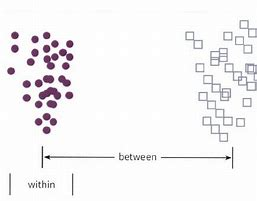
3. 고유값이 큰 순으로 K개(LDA 변환 차수만큼) 추출
4. 고유값이 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

In [28]:
# 붓꽃 데이터 세트에 LDA 적용
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [29]:
# LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습임.
# 클래스의 결정값이 변환시 필요 ! 
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 결정값 입력 됐음에 유의 ! 
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


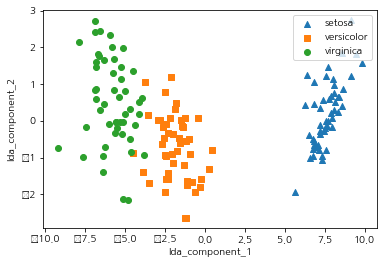

In [31]:
lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^','s','o'] # setosa, versicolor, virginica

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')

plt.show()
# PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아 있음을 알 수 있음

### 4. SVD(Singular Value Decomposition)

#### SVD 개요
- PCA와 유사한 행렬 분해 기법 이용
- PCA의 경우 정방행렬(행,열 크기가 같은 행렬)만 고유벡터로 분해할 수 있지만,   
  SVD는 정방행렬 뿐만 아니라 행과 열 크기가 다른 행렬에도 적용할 수 있음
- m x n크기의 행렬A를 다음과 같이 분해하는 것을 의미
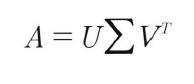
- 특이값 분해로 불리며 , 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이고 모든 특이벡터는 서로 직교하는 성질 가짐
- $\sum$는 대각행렬이며, 행렬 대각에 위치한 값만 0이 아니고 나머지 값은 모두 0임.
- 이때의 0이 아닌 값이 바로 행렬 A의 특이값임.
- A의 차원이 m x n일 때, U의 차원이 m x m, $\sum$의 차원이 m x n , $V^T$의 차원이 n x n 으로 분해
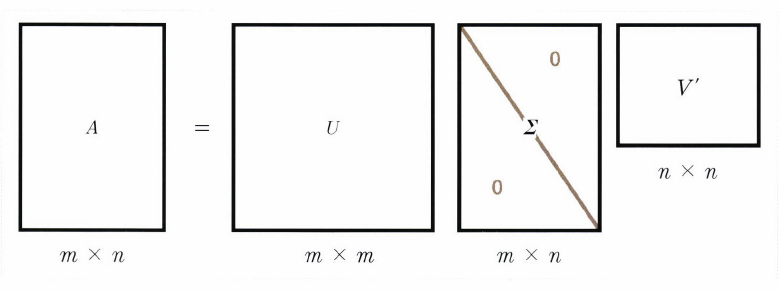

- 일반적으로 $\sum$의 비대각 부분과 대각원소 중 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$에 대응되는 U,V 원소도 함께 제거해 차원을 줄인 형태로 SVD 적용함
- A의 차원이 m x n일 때, U의 차원이 m x p, $\sum$의 차원이 p x p , $V^T$의 차원이 p x n 으로 분해
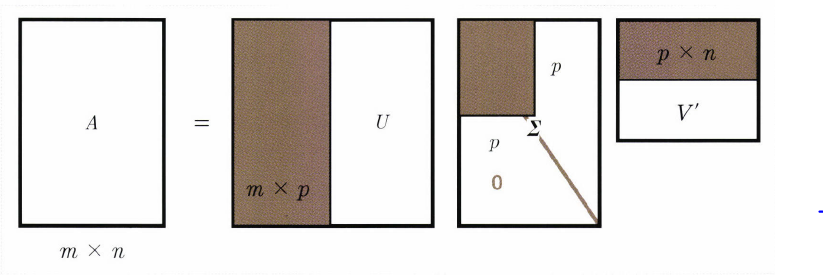

**Truncated SVD**
- SVD의 $\sum$의 대각원소 중 상위 몇개만 추출해 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 행태로 분해

- 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리로 수행

In [32]:
from numpy.linalg import svd
# 랜덤 행렬 생성 이유 : 행렬의 개별 로우끼리 의존성 없애기 위해
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [33]:
# 생성된 a 행렬에 SVD 적용해 U, Sigma, Vt 도출
U, Sigma, Vt = svd(a)
print('U matrix:\n', np.round(U,3)) # 4 x 4
print('Sigma Value:\n', np.round(Sigma,3)) # 4 x 1 / 0이 아닌 값들만 1차원 행렬로 표현
print('V transpose matrix:\n', np.round(Vt,3)) # 4 x 4

U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [36]:
# U, Sigma, Vt를 이용해 원본 행렬 복원해보기
# U, Sigma, Vt 내적 / Sigma의 경의 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환해줘야함
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat),Vt)
print('복원한 행렬:\n',np.round(a_,3))
print('\n')
print('원본 행렬:\n', np.round(a,3))

복원한 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


원본 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [37]:
# 로우 간 의존성이 있을 경우 Sigma값이 어떻게 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기
# 일부로 의존성 부여를 위해 3번째 로우 = 1번째 로우 + 2번째 로우 , 4번째 로우 = 1번째 로우 로 업데이트
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [39]:
# SVD로 분해
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))
# 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함
# 즉 선형 독립인 로우 벡터의 개수가 2개라는 의미임(행렬의 rank = 2)

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [40]:
# 원본 행렬로 복원해보기
# 전체 데이터가 아니라 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
a_ = np.dot(np.dot(U_,Sigma_),Vt_)
print('복원한 행렬:\n',np.round(a_,3))
print('\n')
print('원본 행렬:\n', np.round(a,3))

(4, 2) (2, 2) (2, 4)
복원한 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


원본 행렬:
 [[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [41]:
# Truncated SVD를 이용해 행렬 분해
# 인위적으로 더 작은 차원의 U,Sigma,Vt로 분해하기 때문에 원본 행렬 정확이 복원할 수는 없음
# 데이터의 정보가 압축되어 분해됨에도 상당한 수준으로 원본 행렬 근사는 가능
# 넘파이가 아닌 사이파이에서만 지원됨
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVd

print('\nTruncated SVD로 분해 후 복원한 행렬:\n', matrix_tr)
# 완벽하게 복원되지는 않았지만 근사적으로 복원됨

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원한 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0

#### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 사이파이의 svds와 같이Truncated SVD 연산을 수행해 원본 행렬 분해한 U, Sigma, Vt 행렬을 반환하지는 않음
- PCA 클래스와 유사하게 fit(), transform() 호출해 원본 데이터를 몇개의 주요 컴포넌트로 차원 축소해 변환
- 원본 데이터를 Truncated SVD방식으로 분해된 U * Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


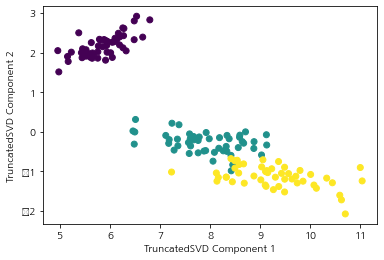

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA

iris = load_iris()
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x = iris_tsvd[:,0], y=iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
# PCA와 유사하게 변환후 품종별로 어느정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가짐
# 사이킷런의 TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬 분해

Text(0.5, 1.0, 'PCA Transformed')

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


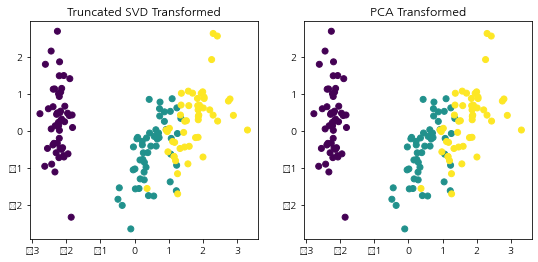

In [43]:
# TruncatedSVD와 PCA 클래스 유사성 확인
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig,(ax1,ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [45]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
# 차이가 모두 0에 가까우므로 두 변환이 서로 동일함을 알 수 있음
# 스케일링으로 데이터의 중심이 동일해지면서 사이킷런의 SVD와 PCA는 동일한 변환 수행함
# 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미함
# 하지만 PCA는 밀집 행렬에 대한 변환만 가능하고 SVD는 희소 행렬도 변환 가능함

2.3657869644792365e-15
-7.19910242530375e-17


### 5. NMF(Non-Negative Matrix Factorization)

#### NMF 개요
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low_Rank Approximation) 방식의 변형
- 원본 행렬 내 모든 원소 값이 모두 양수라는게 보장되면 아래와 같이 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법 지칭
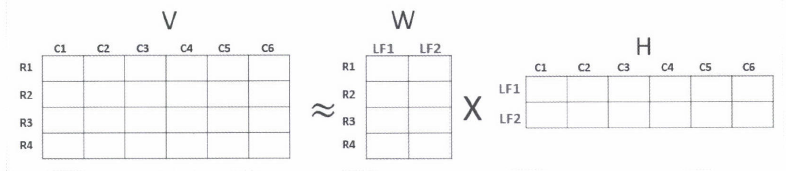
- 행렬 분해를 하게되면 W행렬과 H행렬은 일반적으로 길고 가는 행렬 W(원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬) 와 작고 넓은 행렬 H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해됨
- 이렇게 분해된 행렬은 잠재 요소를 틍성으로 가짐
- 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응하며
- 분해 행렬 H는 이 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지를 나타냄
- SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트 토픽 도출등의 영역에서 사용됨

C:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF Components 2')

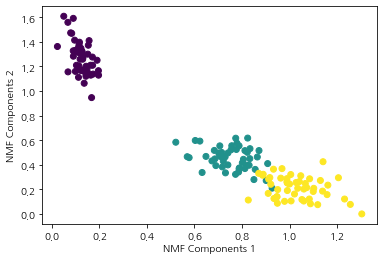

In [47]:
# 붓꽃 데이터로 실습
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Components 1')
plt.ylabel('NMF Components 2')